#PCA and some of its Pitfalls

These are code snippets used to create the figures of the blog post on [Principal Component Analysis (PCA) for Feature Selection and some of its Pitfalls](jotterbach.github.io/2016/03/24/Principal_Component_Analysis/)

In [4]:
import pandas as pd
import numpy as np
import numpy.random as rd
import sklearn
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


##Visualizing PCA and centering data

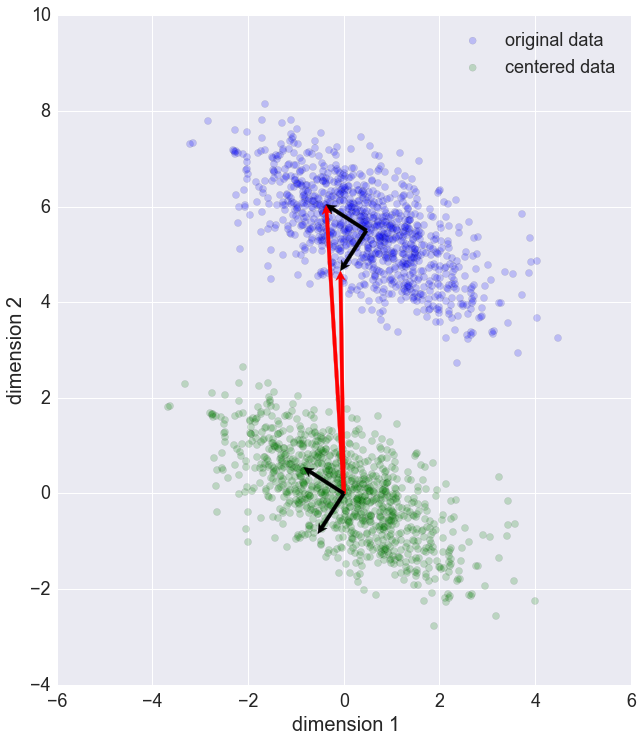

In [38]:
mean = np.array([.5, 5.5])
cov = np.array([[1.5, -.75], [-.75, .85]])
rd.seed = 42
data = rd.multivariate_normal(mean, cov, 1000)
c_data = data - data.mean(axis=0)

U, S, V = np.linalg.svd(c_data)

fig = plt.figure(figsize=(12,12))


plt.scatter(data[:, 0], data[:, 1], alpha = .2, s=50, label="original data");
ax = plt.axes()
bias = data.mean(axis=0)
ax.arrow(0, 0, bias[0] + V[0, 0], bias[1] + V[0, 1] , head_width=.2, head_length=0.2, fc='r', ec='r', width = .075, overhang = .2, length_includes_head = True)
ax.arrow(0, 0, bias[0] + V[1, 0], bias[1] + V[1, 1] , head_width=.2, head_length=0.2, fc='r', ec='r', width = .075, overhang = .2, length_includes_head = True)

plt.scatter(c_data[:, 0], c_data[:, 1], c='g', alpha = .2, s=50, label="centered data");
ax = plt.axes();
ax.arrow(0, 0, V[0, 0] , V[0, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True);
ax.arrow(0, 0, V[1, 0] , V[1, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True);

ax.arrow(bias[0], bias[1], V[0, 0], V[0, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True)
ax.arrow(bias[0], bias[1], V[1, 0], V[1, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True)
ax.set_aspect('equal')

plt.xlabel("dimension 1", fontsize=20)
plt.ylabel("dimension 2", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(loc='best', fontsize=18)

##Explained variance ratios of PCA and the variance in original space

###Unscaled Dataset

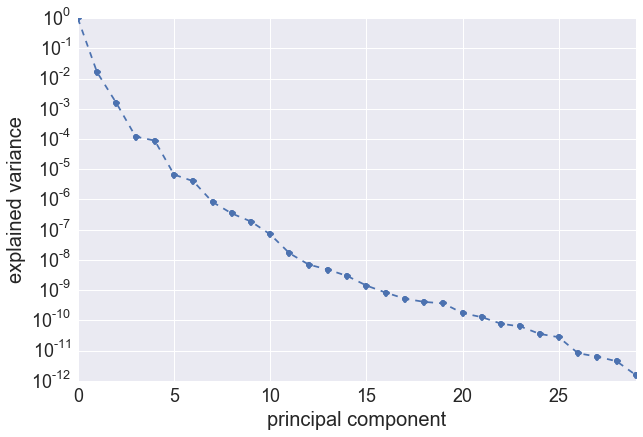

In [49]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.decomposition import PCA

data = ds.load_breast_cancer()['data'];
pca_trafo = PCA().fit(data);

plt.figure(figsize = (10,6.5));
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
plt.xlabel('principal component', fontsize = 20);
plt.ylabel('explained variance', fontsize = 20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29]);


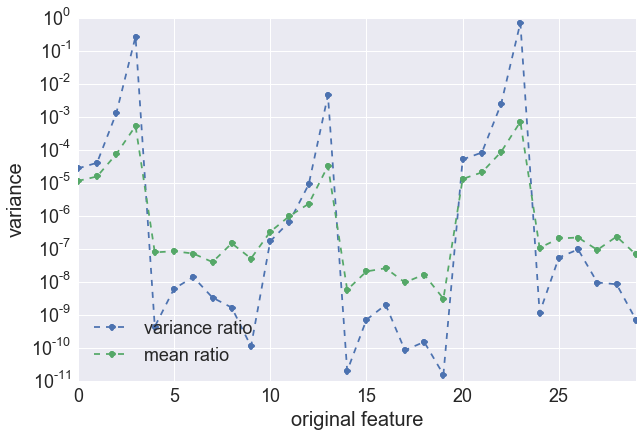

In [65]:
plt.figure(figsize = (10,6.5));
plt.semilogy(np.square(data.std(axis=0)) / np.square(data.std(axis=0)).sum(), '--o', label = 'variance ratio');
plt.semilogy(data.mean(axis=0) / np.square(data.mean(axis=0)).sum(), '--o', label = 'mean ratio');
plt.xlabel('original feature', fontsize = 20);
plt.ylabel('variance', fontsize = 20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29]);
plt.legend(loc='lower left', fontsize=18);

###Scaled Dataset

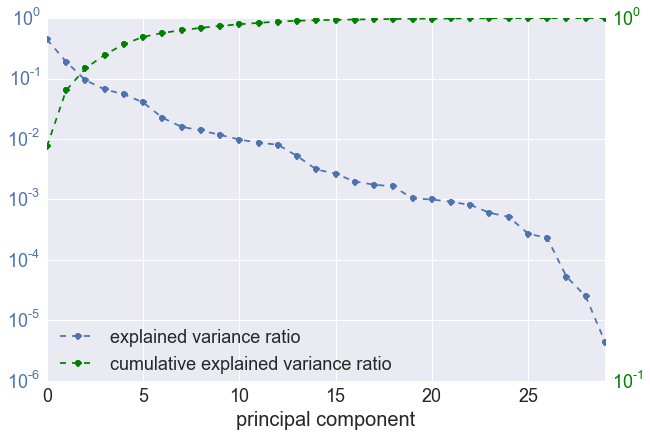

In [150]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
data = ds.load_breast_cancer()['data'];

z_data = z_scaler.fit_transform(data)
pca_trafo = PCA().fit(z_data);

fig, ax1 = plt.subplots(figsize = (10,6.5))
ax1.semilogy(pca_trafo.explained_variance_ratio_, '--o', label = 'explained variance ratio');
color =  ax1.lines[0].get_color()
ax1.set_xlabel('principal component', fontsize = 20);
for tl in ax1.get_yticklabels():
    tl.set_color(plot1[0].get_color())
    
plt.legend(loc=(0.01, 0.075) ,fontsize = 18);

ax2 = ax1.twinx()
ax2.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--go', label = 'cumulative explained variance ratio');
for tl in ax2.get_yticklabels():
    tl.set_color('g')

ax1.tick_params(axis='both', which='major', labelsize=18);
ax1.tick_params(axis='both', which='minor', labelsize=12);
ax2.tick_params(axis='both', which='major', labelsize=18);
ax2.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29]);
plt.legend(loc=(0.01, 0),fontsize = 18);

##Inverse PCA and biases

###Unscaled Dataset

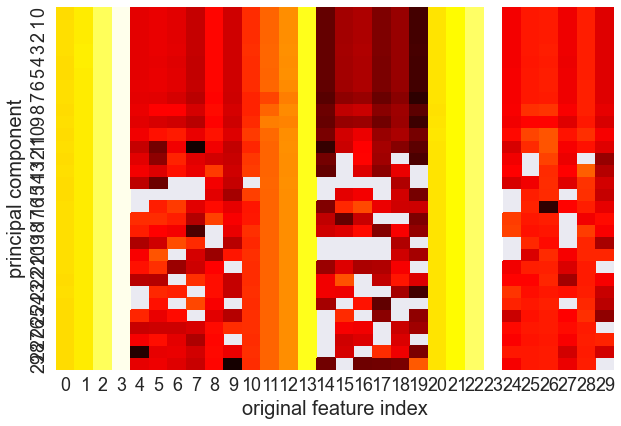

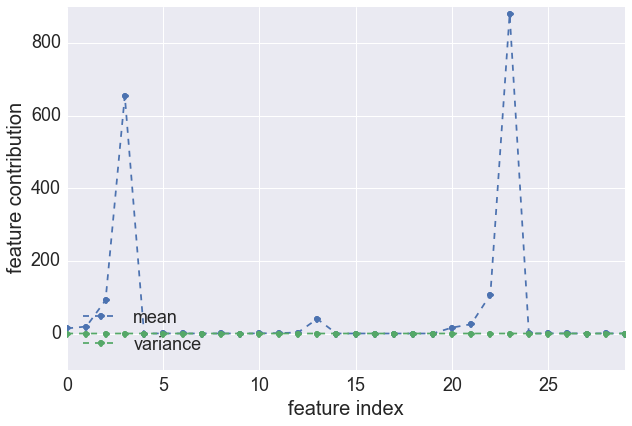

In [187]:
from sklearn.decomposition import PCA

n_comp =30
pca_trafo = PCA(n_components=n_comp)
data = ds.load_breast_cancer()['data']

pca_data = pca_trafo.fit_transform(data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(n_comp))), cmap="hot", cbar=False)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)

###Scaled Dataset

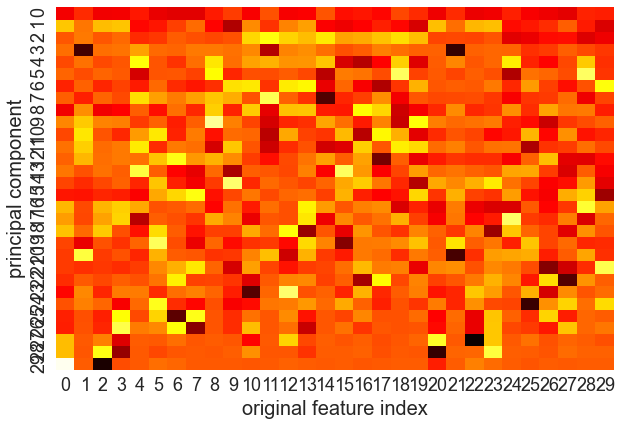

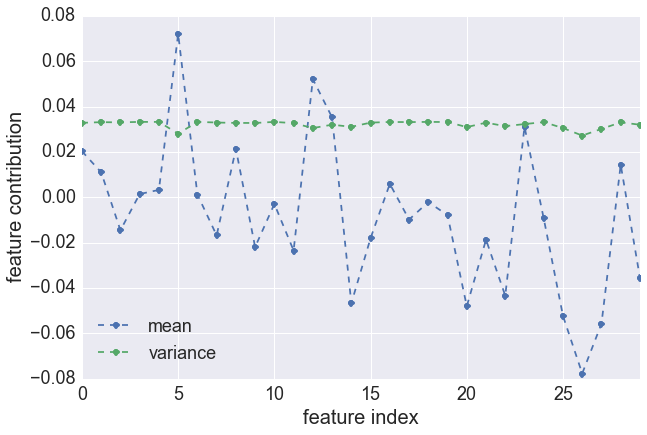

In [186]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_comp =30
pca_trafo = PCA(n_components=n_comp)
data = ds.load_breast_cancer()['data']

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(pca_trafo.inverse_transform(np.eye(n_comp)), cmap="hot", cbar=False)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)